# ESCI 445 Exercise 6B - Relaxation Function

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Read Data

In [2]:
filename = "exercise-6-vorticity-input.dat"

zeta = np.loadtxt(filename, dtype = np.float_)
zeta = np.transpose(zeta)  # transposes to get orientation correct

### Set Up Parameters

In [3]:
dx = 2e5  # Grid spacing in meters
threshhold = 1e-8  # Tolerance

numx, numy = np.shape(zeta)  # Calculates shape of array

### Create and Initialize Guess Field and Array of Residuals

In [4]:
guess = np.zeros_like(zeta)  # Array for guess field

# # Guess field for Part II.  Just uncomment
# for j in range(0,numy):
#     guess[:,j] = -8.74e6*j + 6.55e8

### <font color = 'blue'><i>*Define relaxation function

In [5]:
def relax(G, vort, d, epsilon):
    
    nx, ny = np.shape(vort)  #  Calculate shape of arrays
    R = np.zeros_like(vort)  # Array for residuals
    
    # Ensures one residual out of tolerance so that while loop will execute
    R[int(nx/2), int(ny/2)] = 9999.9

    # Calculate over-relaxation coefficient
    t = np.cos(np.pi/nx) + np.cos(np.pi/ny)
    alpha = (8 - 4 * np.sqrt(4-t**2)) / t**2

    # Loop for relaxation
    while (np.max(np.abs(R))) >= epsilon:
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                R[i,j] = (G[i-1,j] + G[i+1,j] + G[i,j-1] + G[i,j+1] - 4*G[i,j]) / d**2 - vort[i,j]
                G[i,j] = G[i,j] + alpha*(d**2/4) * R[i,j]
    
    # Remember to return your result!
    return G

### Call relaxation function

In [6]:
psi = relax(guess, zeta, dx, threshhold )

### Create Plot

<IPython.core.display.Javascript object>


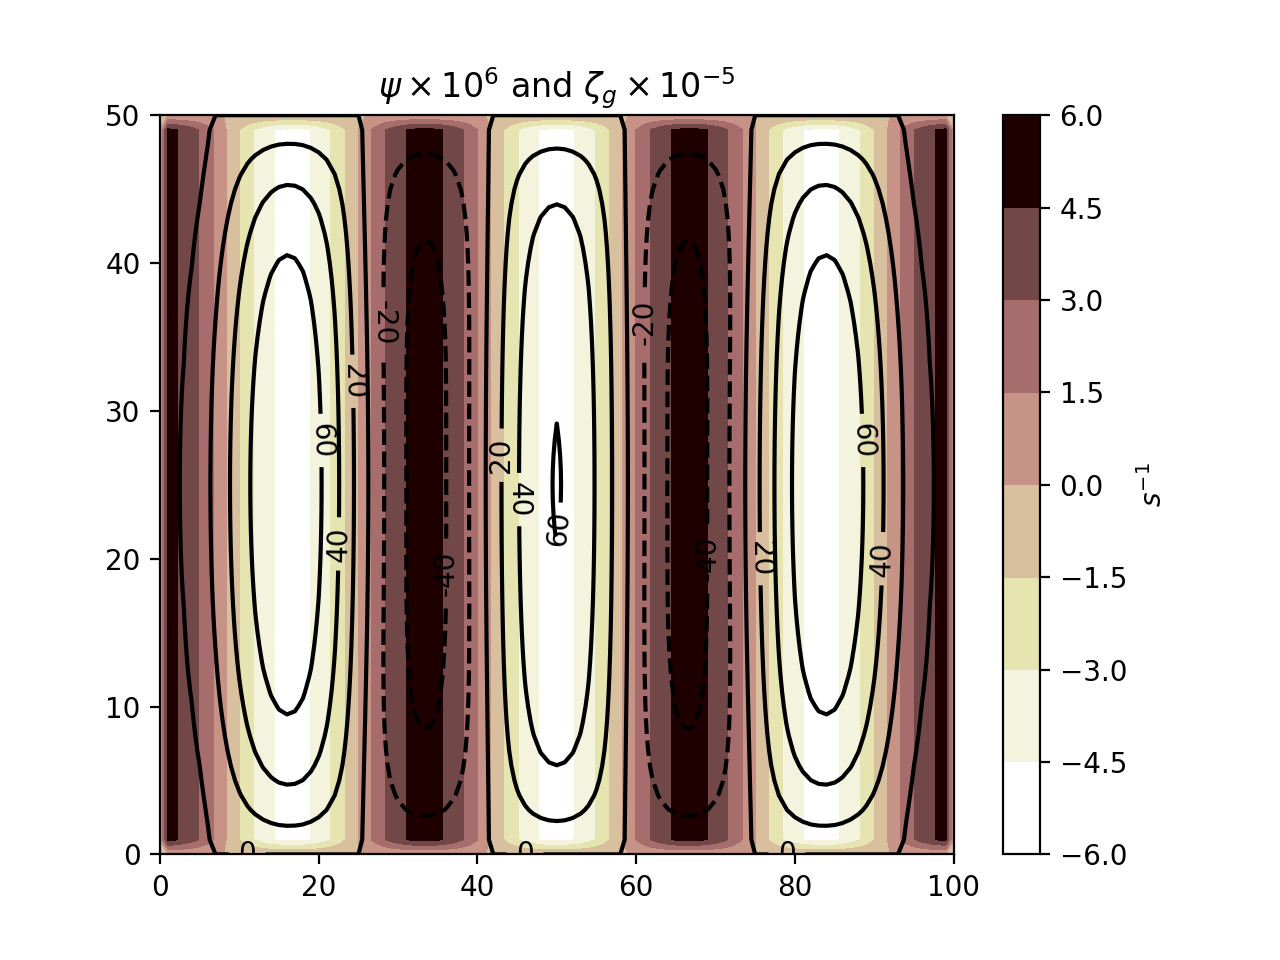

In [7]:
%matplotlib notebook

#Create scaled and transposed arrays for plotting
zeta, psi = np.transpose(zeta)*1e5, np.transpose(psi)*1e-6

ny, nx = np.shape(psi)

fig = plt.figure()
ax = fig.add_subplot(111)

pc = ax.contourf(zeta,vmin = np.min(zeta), vmax = np.max(zeta),
                 cmap = cm.get_cmap('pink_r'))
ax.set_xlim(0,nx-1)
ax.set_ylim(0,ny-1)
cb = plt.colorbar(pc,ax = ax)
cb.set_label(r'$s^{-1}$')
cs = ax.contour(psi, colors = 'black')
plt.clabel(cs, fmt = '%.0f', inline = True)
ax.set_title(r'$\psi\times 10^{6}$ and $\zeta_g\times 10^{-5}$')

plt.show()